# Creating KNN algo

In [28]:
import numpy as np
from collections import Counter

In [27]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [23]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [93]:
# tutorial about Counter:
#a = [1,1,1,2,2,3,4,5,6]
#from collections import Counter
#most_common = Counter(a).most_common() #[0][0]
#print(most_common)
#output shows the number of repetition of each array in list a

# Training

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [7]:
#loading data
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [10]:
import pandas as pd
dataset = pd.read_csv('Iris.csv')


In [11]:
dataset.shape

(150, 6)

In [12]:
dataset.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [14]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
dataset['Species'].value_counts()
#so we have 3 sorts of Iris flowers (Iris-setosa, Iris-versicolor and  Iris-virginica) that are labled in 0,1 and 2

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [39]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [40]:
X_train.shape

(112, 4)

In [41]:
X_test.shape
# so we were succsessful to test all 38 rows af data
#See Vazan's ML book, page: 249

(38, 4)

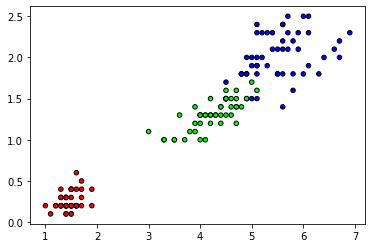

In [19]:
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

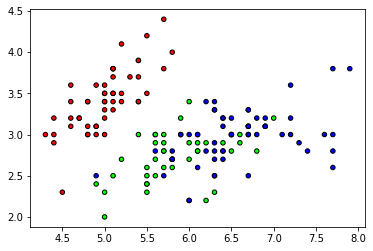

In [20]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [42]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [43]:
print(predictions)
#0,1 and 2 are these 3 lables of iris flowers(Iris-setosa,Iris-versicolor and  Iris-virginica)
# the number of output labels is: 38

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0]


In [44]:
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

1.0


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
# 13+15+10 = 38
#13 is the number of repetition of label '0'. 
# 15 is the number of repetition of label '1'. 
# 10 is the number of repetition of label '2'. 

[[13  0  0]
 [ 0 15  0]
 [ 0  0 10]]


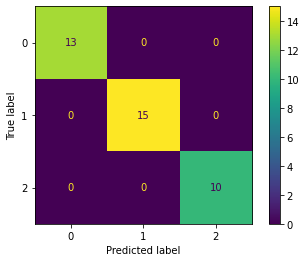

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
               
cm = confusion_matrix(y_test, predictions, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
disp.plot()

plt.show()               
                 


In [46]:
print(classification_report(y_test, predictions))
#Accuraci is 1. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Tutorials

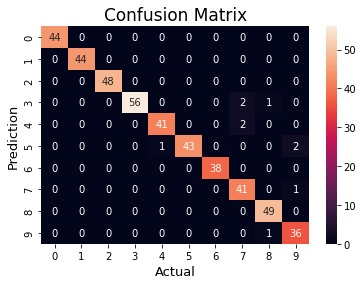

Accuracy : 0.9777777777777777


In [59]:
# Tutorial for confusion matrix
# Ref: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

#Import the necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the breast cancer dataset
X, y= load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

# Train the model
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)

# preduction
y_pred = clf.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)


In [ ]:
#In this confusion matrix we have 9 lables!